In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
#matplotlib inline

ACP permet de voir quelle variance est la plus grande, et va dire que c'est la composante principale.

tsne calcule la distance entre les points en grandes dimensions, et essaye de minimiser les erreurs

In [2]:
data = pd.read_csv('train.csv').sample(50000, random_state=23)
STOP_WORDS = nltk.corpus.stopwords.words()

In [10]:
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
237921,237921,9732,79801,Is sex necessary in a relationship?,Why is sex important in a good relationship?,1
181001,181001,277377,277378,What are the most inspiring start up stories?,What are the most inspirational stories ever?,0
294691,294691,150129,93109,What is your best way to do digital marketing?,What are the best unique ways to do Digital Ma...,1
104145,104145,171986,171987,What is the best way to grow a Facebook fan page?,How do I get more followers on my Facebook page?,1
357893,357893,487310,487311,Suppose Host A sends two TCP segments back to ...,Suppose Host A sends two TCP segments back to ...,1


In [7]:
def clean_sentence(val):
    # remove chars that are not letters or numbers, downcase, then remove stop words
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

In [8]:
def clean_dataframe(data):
    # drop nans, then apply 'clean_sentence' function to question1 and 2
    data = data.dropna(how="any")
    
    for col in ['question1', 'question2']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

In [11]:
cleaned_data = clean_dataframe(data)

In [12]:
def build_corpus(data):
    # Creates a list of lists containing words from each sentence
    corpus = []
    for col in ['question1', 'question2']:
        for sentence in data[col].items():
        #for sentence in data[col]:
            #print(sentence)
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

In [13]:
cleaned_data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
237921,237921,9732,79801,sex relationship,sex important relationship,1
181001,181001,277377,277378,inspiring start stories,inspirational stories,0
294691,294691,150129,93109,digital marketing,unique ways digital marketing,1
104145,104145,171986,171987,grow facebook page,followers facebook page,1
357893,357893,487310,487311,suppose host sends tcp segments back back host...,suppose host sends tcp segments back back host...,1


In [14]:
corpus = build_corpus(cleaned_data)        
# corpus[0:2]

model = word2vec.Word2Vec(corpus, vector_size=100, window=20, min_count=200, workers=4) # workers = number of threads
model.wv['trump']

vocab = []
for i in range(0,len(model.wv)):
        vocab.append(model.wv.index_to_key[i])

In [50]:
corpus

[['sex', 'relationship'],
 ['inspiring', 'start', 'stories'],
 ['digital', 'marketing'],
 ['grow', 'facebook', 'page'],
 ['suppose',
  'host',
  'sends',
  'tcp',
  'segments',
  'back',
  'back',
  'host',
  'b',
  'tcp',
  'connection',
  'segment',
  'sequence',
  'number',
  '140',
  'sequence',
  'number',
  '170'],
 ['sahara', 'average', 'temperatures', 'compare', 'dashte', 'loot'],
 ['possible', 'disable', 'facetimes', 'call', 'button'],
 ['agencies', 'fulfil', 'sex', 'fantasies', 'usa'],
 ['signs', 'mentally', 'weak'],
 ['different', 'quora'],
 ['find', 'list', 'gmail', 'addresses'],
 ['resources', 'learning', 'hana'],
 ['business', 'opportunities', 'india'],
 ['coding', 'language', 'learn', 'making', 'games'],
 ['interesting', 'products', 'innovations', 'brands', 'coming', '2016'],
 ['question',
  'quora',
  'marked',
  'needing',
  'improvement',
  'make',
  'invisible'],
 ['expected',
  'cut',
  'ssc',
  'cgl',
  'tier',
  '1',
  '2016',
  'cut',
  'rise',
  'paper',
  'easy

In [51]:
corpus[0:2]

[['sex', 'relationship'], ['inspiring', 'start', 'stories']]

In [15]:
def tsne_plot(model):
    #Creates and TSNE model and plots it
    labels = []
    tokens = []

    for word in vocab:
        tokens.append(model.wv[word])
        labels.append(word)
        #print(tokens)
        #print(labels)
    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23) # visualisation and dimension reduction (PCA)
    new_values = tsne_model.fit_transform(tokens)


    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    
    
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\marya\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\marya\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\marya\anaconda3\envs\NLP\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\marya\anaconda3\envs\NLP\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\marya\anaconda3\envs\NLP\Lib\subprocess.py", line 1538,

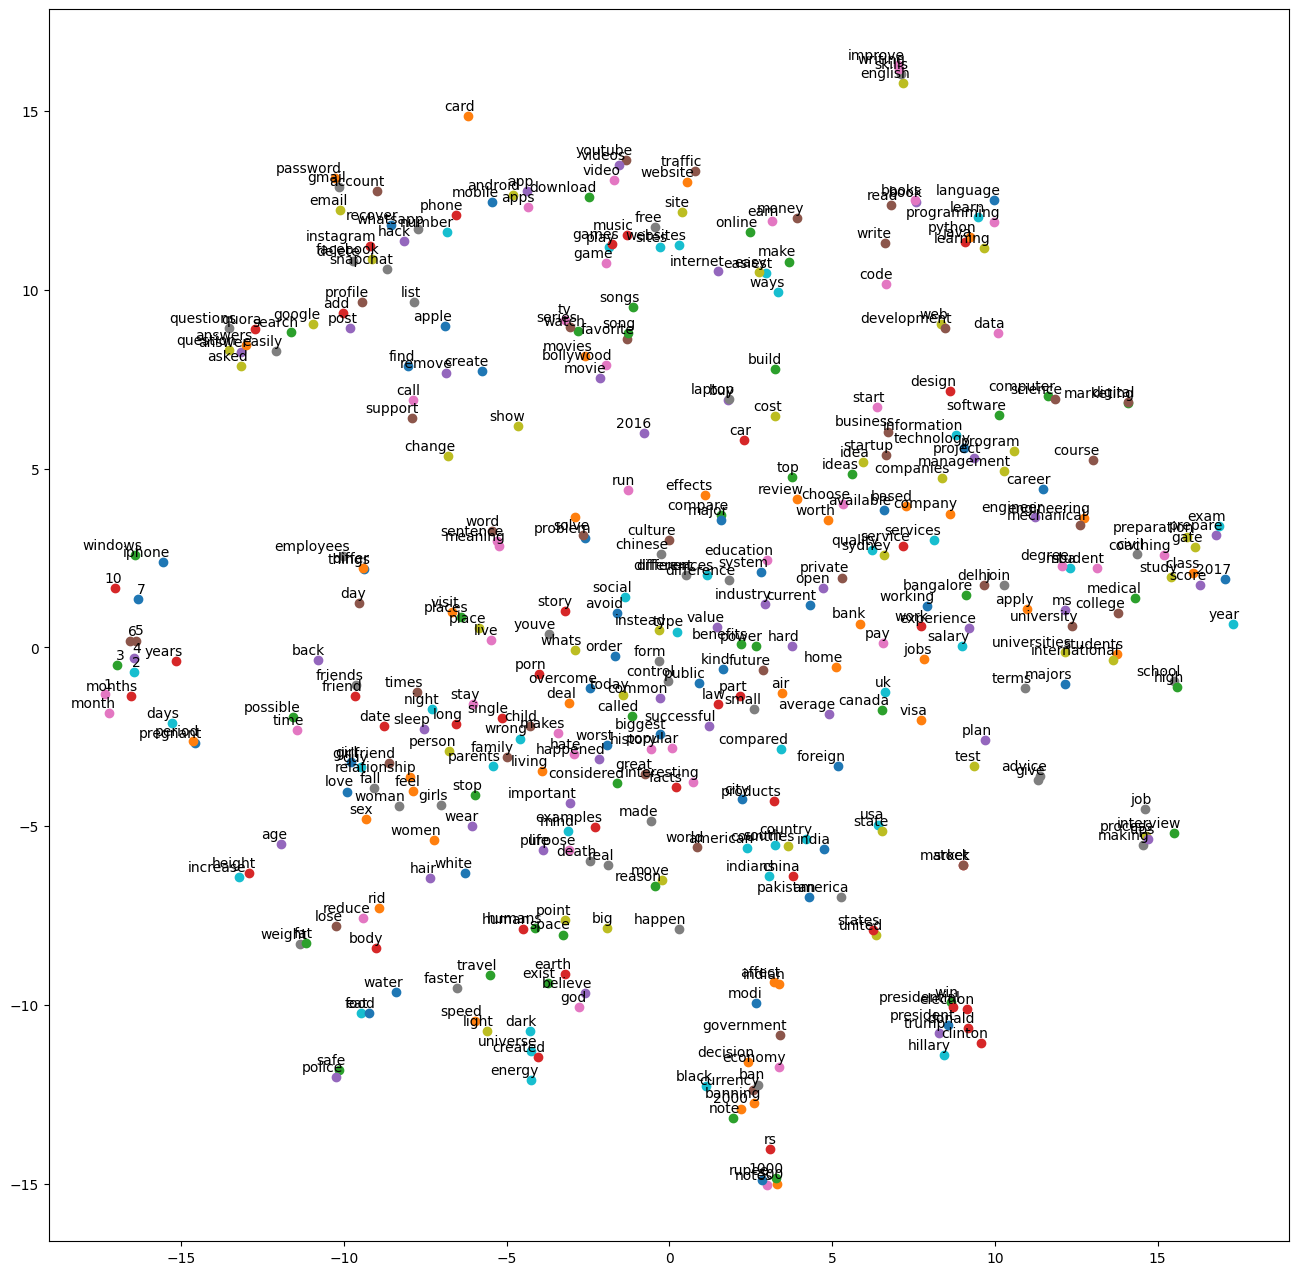

In [16]:
tsne_plot(model)


#### Word2Vec trandforme le texte en vecteurs pour qu'on puisse utiliser tous les modèles de machine learning dessus
#### CBOW 

## Exercise 2

 Start to design an Information Retrieval system using the dataset CNN. It’s composed of pairs of
documents and summaries. We will use the summaries as request and the goal will be to find the
related document. Your system need to return a rank for all the documents.
If your model is perfect (theoretically), the first document of the list is the document paired with the
request summary.
To simplify you can start with only the first 100 (Document,Summary) pairs.
You can use Word2vec, TF-IDF or any other pre-treatment.

In [35]:
import pickle

#### Load the text data

In [22]:
def loadCNN():
	file = open("CNN/CNNArticles",'rb')
	articles = pickle.load(file)
	file = open("CNN/CNNGold",'rb')
	abstracts = pickle.load(file)

	articlesCl = []  
	for article in articles:
		articlesCl.append(article.replace("”", "").rstrip("\n"))
	articles = articlesCl
	  
	articlesCl = []  
	for article in abstracts:
		articlesCl.append(article.replace("”", "").rstrip("\n"))
	abstracts = articlesCl
    
	return articles, abstracts

In [23]:
articles, abstracts = loadCNN()

In [24]:
print("ARTICLE=",articles[0])
print("SUMMARY=",abstracts[0])

ARTICLE= turkey has blocked access to twitter and youtube after they refused a request to remove pictures of a prosecutor held during an armed siege last week . a turkish court imposed the blocks because images of the deadly siege were being shared on social media and ` deeply upset ' the wife and children of mehmet selim kiraz , the hostage who was killed . the 46-year-old turkish prosecutor died in hospital when members of the revolutionary people 's liberation party-front ( dhkp-c ) stormed a courthouse and took him hostage . the dhkp-c is considered a terrorist group by turkey , the european union and us . a turkish court has blocked access to twitter and youtube after they refused a request to remove pictures of prosecutor mehmet selim kiraz held during an armed siege last week grief : the family of mehmet selim kiraz grieve over his coffin during his funeral at eyup sultan mosque in istanbul , turkey . he died in hospital after he was taken hostage by the far-left organisation tw

### Get only the first 100 documents and summaries

In [29]:
articles100 = articles[0:100]
abstracts100 = abstracts[0:100]

Faire une méthode hybride avec le TF IDF et les vecteurs. Avec le filtrage de dimensions comme la PCA ou le TSNE

In [31]:
abstract1 = abstracts100[0]

### Clean articles and the abstract

In [34]:
articles100[1]

"deborah fuller has been banned from keeping animals after she dragged her dog behind her car , causing wounds as she drove at 30mph a dog breeder and exhibitor who dragged her pet behind her car at a speed of 30mph and failed to get painful wounds to its paws and chest treated , has been banned from keeping animals and had her dogs confiscated . deborah fuller , 56 , dragged her dog tango for 400 metres behind her car as she drove along the b1066 near long melford , essex . the rhodesian ridgeback was left with injuries to all four paws as well as grazing to his chest and a deep wound on his elbow . he is believed to have somehow escaped from the boot of her car and was dragged along the single carriageway because his lead was attached to the vehicle 's tailgate . fuller , of lawford , essex , denied causing unnecessary suffering to an animal by not taking it to the vets and failing to take steps to safely secure a dog within a vehicle , but was convicted following a hearing at chelms

In [36]:
STOP_WORDS = nltk.corpus.stopwords.words()

In [42]:
def clean_text(val):
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")

    for word in list(sentence):
        if word in STOP_WORDS or word == "":
            sentence.remove(word)  

    return sentence

In [49]:
cleaned_doc = clean_text(articles100[1])
cleaned_doc

['deborah',
 'fuller',
 'banned',
 'keeping',
 'animals',
 'dragged',
 'car',
 'causing',
 'wounds',
 'drove',
 '30mph',
 'breeder',
 'exhibitor',
 'dragged',
 'car',
 'speed',
 '30mph',
 'failed',
 'painful',
 'wounds',
 'paws',
 'chest',
 'treated',
 'banned',
 'keeping',
 'animals',
 'dogs',
 'confiscated',
 'deborah',
 'fuller',
 '56',
 'dragged',
 'tango',
 '400',
 'metres',
 'car',
 'drove',
 'b1066',
 'long',
 'melford',
 'essex',
 'rhodesian',
 'ridgeback',
 'left',
 'injuries',
 'paws',
 'grazing',
 'chest',
 'deep',
 'wound',
 'elbow',
 'believed',
 'escaped',
 'boot',
 'car',
 'dragged',
 'single',
 'carriageway',
 'lead',
 'attached',
 'vehicle',
 'tailgate',
 'fuller',
 'lawford',
 'essex',
 'denied',
 'causing',
 'unnecessary',
 'suffering',
 'animal',
 'taking',
 'vets',
 'failing',
 'steps',
 'safely',
 'secure',
 'vehicle',
 'convicted',
 'hearing',
 'chelmsford',
 'magistrates',
 'court',
 'fuller',
 'banned',
 'keeping',
 'animals',
 'years',
 '27',
 'dogs',
 'confis

In [45]:
len(cleaned_doc)

375

In [52]:
cleaned_summary = clean_text(abstract1)
cleaned_summary

['turkish',
 'court',
 'imposed',
 'blocks',
 'images',
 'siege',
 'shared',
 'social',
 'media',
 'images',
 'deeply',
 'upset',
 'wife',
 'children',
 'hostage',
 'mehmet',
 'selim',
 'kiraz',
 'prosecutor',
 '46',
 'died',
 'hospital',
 'hostages',
 'stormed',
 'courthouse',
 'captors',
 'killed',
 'security',
 'forces',
 'back',
 'building']

In [47]:
len(cleaned_summary)

31

In [53]:
doc_corpus = []
for article in articles100:
    cleaned_article = clean_text(article)
    doc_corpus.append(cleaned_article)

In [54]:
len(doc_corpus)

100

### TF-IDF test

Use it to filter the most important word in each doc ?

https://medium.com/saturdays-ai/building-a-text-summarizer-in-python-using-nltk-and-scikit-learn-class-tfidfvectorizer-2207c4235548

https://towardsdatascience.com/text-summarization-using-tf-idf-e64a0644ace3

### Identify the context of the abstract